In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
ds = pd.read_csv('dataset/diabetes.csv')
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
ds.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# EDA

In [4]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check Missing Value

In [5]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Duplicated

In [6]:
ds.duplicated().sum()

0

### Normal Distribution

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distribut

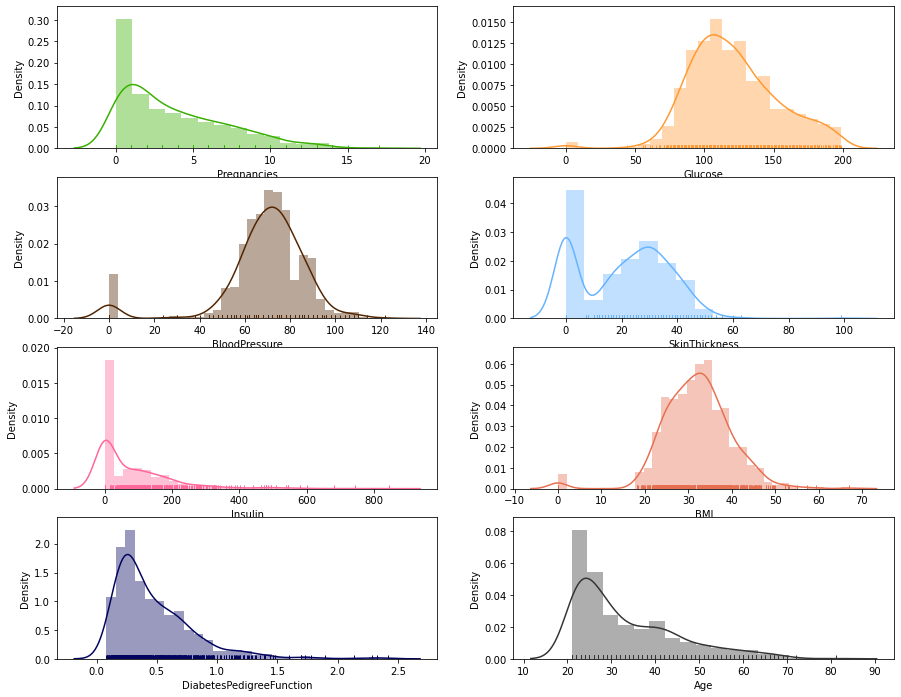

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()

sns.distplot(ds['Pregnancies'],rug=True,color='#38b000',ax=axs[0], kde=True)
sns.distplot(ds['Glucose'],rug=True,color='#FF9933',ax=axs[1], kde=True)
sns.distplot(ds['BloodPressure'],rug=True,color='#522500',ax=axs[2], kde=True)
sns.distplot(ds['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3], kde=True)
sns.distplot(ds['Insulin'],rug=True,color='#FF6699',ax=axs[4], kde=True)
sns.distplot(ds['BMI'],color='#e76f51',rug=True,ax=axs[5], kde=True)
sns.distplot(ds['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6], kde=True)
sns.distplot(ds['Age'],rug=True,color='#333533',ax=axs[7], kde=True)
plt.show()

### Feature Selection

#### Kendall

In [8]:
kend_pearson = ds.corr(method='kendall')

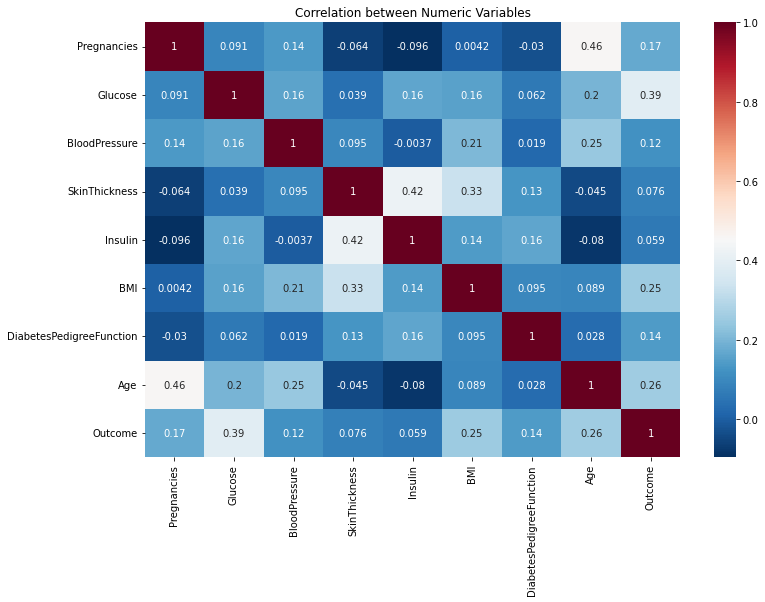

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(kend_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

#### ANOVA

In [ ]:
df_feature = ds.drop('Outcome',1)
sr_outcome = ds['Outcome']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

anov_selector = SelectKBest(f_classif, k=5) 
anov_selector.fit(df_feature, sr_outcome)

cols = anov_selector.get_support(indices=True)
df_selected_features = df_feature.iloc[:,cols]

In [40]:
df_selected_features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33


## Drop Column

In [10]:
ds.Outcome.replace([0,1], ['No', 'Yes'], inplace=True)
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No
766,1,126,60,0,0,30.1,0.349,47,Yes


In [11]:
ds.columns
# Yang dipake-> 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'
# Yang dibuang ->  'SkinThickness','Insulin','DiabetesPedigreeFunction'

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
ds.drop(columns=['SkinThickness', 'Insulin','DiabetesPedigreeFunction'], inplace=True)
ds

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,Yes
1,1,85,66,26.6,31,No
2,8,183,64,23.3,32,Yes
3,1,89,66,28.1,21,No
4,0,137,40,43.1,33,Yes
...,...,...,...,...,...,...
763,10,101,76,32.9,63,No
764,2,122,70,36.8,27,No
765,5,121,72,26.2,30,No
766,1,126,60,30.1,47,Yes


### Outliers

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-p

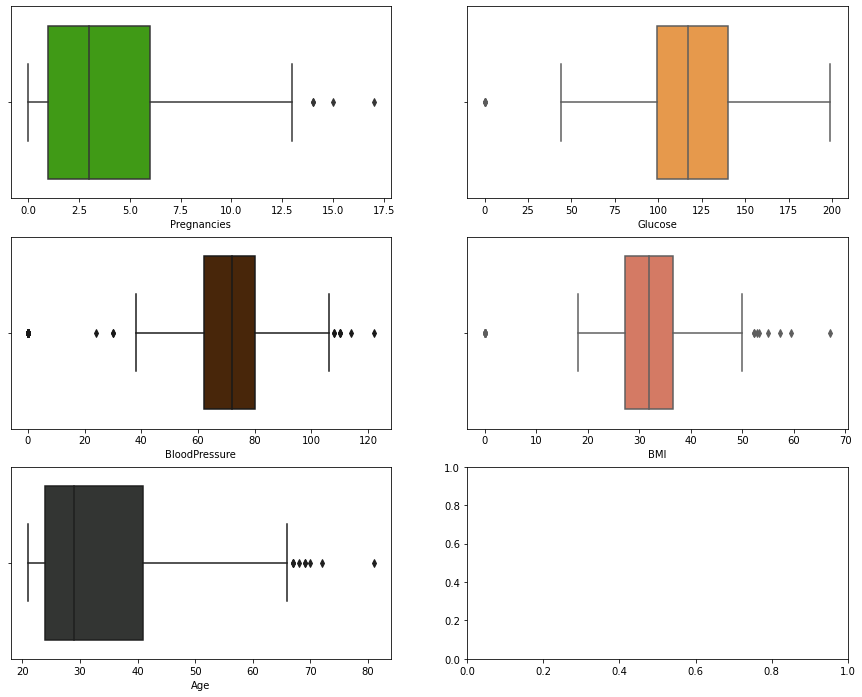

In [13]:
fig, axs2 = plt.subplots(3, 2, figsize=(15,12))
axs2 = axs2.flatten()

sns.boxplot(ds['Pregnancies'],color='#38b000',ax=axs2[0])
sns.boxplot(ds['Glucose'],color='#FF9933',ax=axs2[1])
sns.boxplot(ds['BloodPressure'],color='#522500',ax=axs2[2])
sns.boxplot(ds['BMI'],color='#e76f51',ax=axs2[3])
sns.boxplot(ds['Age'],color='#333533',ax=axs2[4])
plt.show()

In [14]:
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome'], dtype='object')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-p

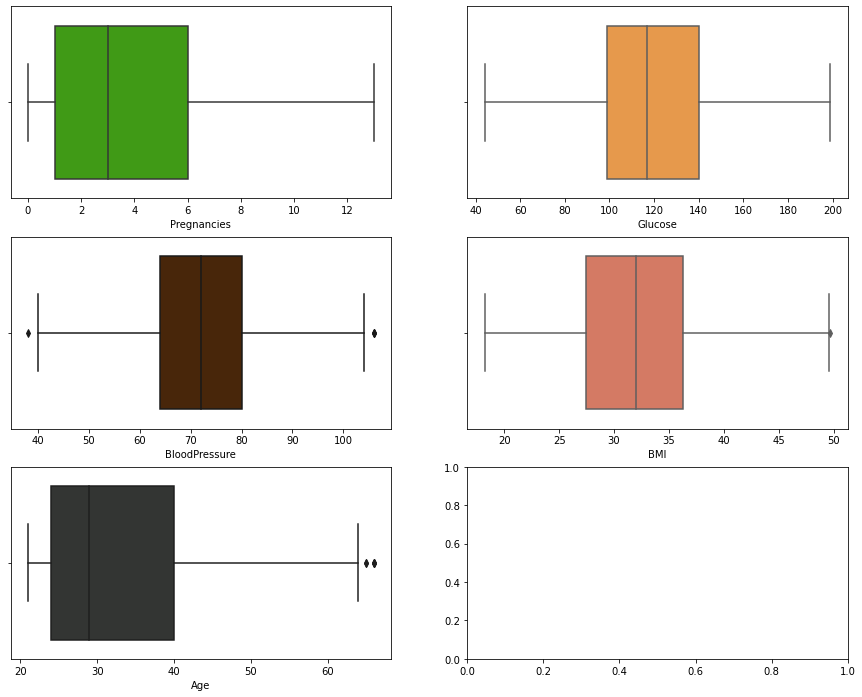

In [15]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

drop_outliers(ds, 'Pregnancies')
drop_outliers(ds, 'Glucose')
drop_outliers(ds, 'BloodPressure')
drop_outliers(ds, 'BMI')
drop_outliers(ds, 'Age')

fig, axs2 = plt.subplots(3, 2, figsize=(15,12))
axs2 = axs2.flatten()

sns.boxplot(ds['Pregnancies'],color='#38b000',ax=axs2[0])
sns.boxplot(ds['Glucose'],color='#FF9933',ax=axs2[1])
sns.boxplot(ds['BloodPressure'],color='#522500',ax=axs2[2])
sns.boxplot(ds['BMI'],color='#e76f51',ax=axs2[3])
sns.boxplot(ds['Age'],color='#333533',ax=axs2[4])
plt.show()

In [16]:
ds.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
BMI              0
Age              0
Outcome          0
dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distribut

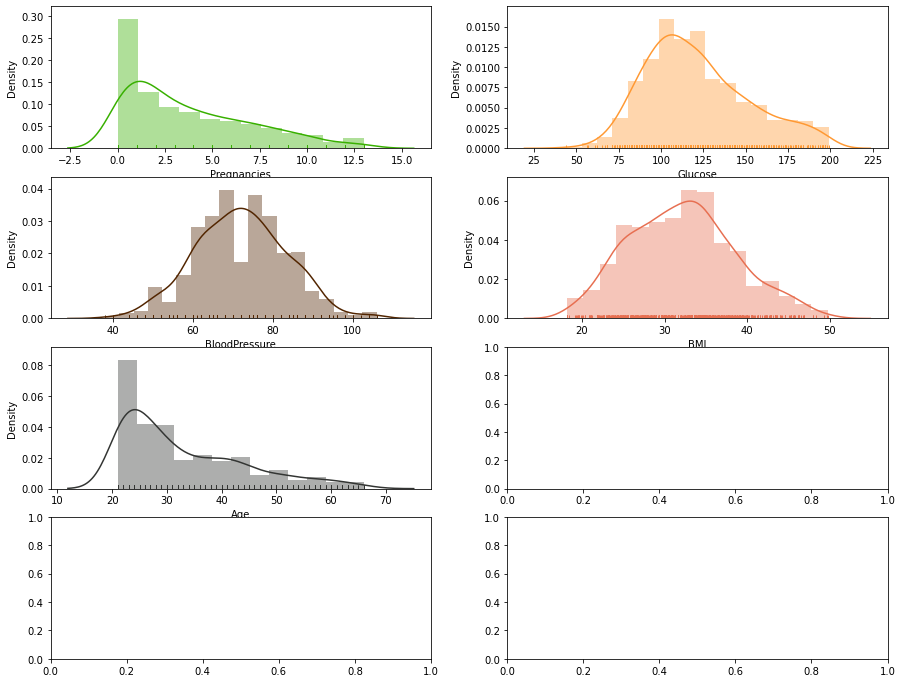

In [17]:
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()

sns.distplot(ds['Pregnancies'],rug=True,color='#38b000',ax=axs[0], kde=True)
sns.distplot(ds['Glucose'],rug=True,color='#FF9933',ax=axs[1], kde=True)
sns.distplot(ds['BloodPressure'],rug=True,color='#522500',ax=axs[2], kde=True)
sns.distplot(ds['BMI'],color='#e76f51',rug=True,ax=axs[3], kde=True)
sns.distplot(ds['Age'],rug=True,color='#333533',ax=axs[4], kde=True)
plt.show()

# Split

In [18]:
X = ds.drop(columns='Outcome')
y = ds.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((557, 5), (140, 5), (557,), (140,))

In [19]:
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome'], dtype='object')

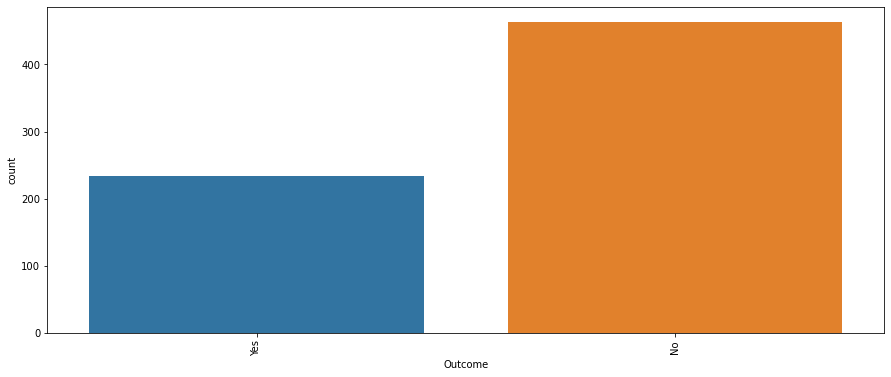

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.countplot(x=ds['Outcome'], data = ds)
plt.xticks(rotation=90)
plt.show()

In [64]:
ds.Outcome.value_counts()

No     463
Yes    234
Name: Outcome, dtype: int64

# Smote

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
# define oversampling strategy
SMOTE = SMOTE()
NR = NearMiss()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE == 1)))

In [ ]:
X_train_SMOTE.columns

# Preprocessing

In [21]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')

In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer

numpipe = Pipeline([
    ('minmax', RobustScaler()),
    ('impute', SimpleImputer(strategy='median')),
    ('transform', PowerTransformer(method='yeo-johnson'))
])

from sklearn.compose import ColumnTransformer
prep = ColumnTransformer([
    ('prep', numpipe, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'])
])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

final_knn = Pipeline([
    ('prep', prep),
    ('algo_knn', KNeighborsClassifier())
])

final_logistic = Pipeline([
    ('prep', prep),
    ('algo', LogisticRegression(C=0.118, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False))
])

final_tree = Pipeline([
    ('prep', prep),
    ('algo_tree', DecisionTreeClassifier())
])

final_random = Pipeline([
    ('prep', prep),
    ('algo_rand', RandomForestClassifier()
    )
])

final_ada = Pipeline([
    ('prep', prep),
    ('algo_ada', AdaBoostClassifier(
                    base_estimator=None,
                    n_estimators=100,
                    learning_rate=0.5,
                    algorithm='SAMME.R',
                    random_state=1,
    )
    )
])

final_grad = Pipeline([
    ('prep', prep),
    ('algo_grad', GradientBoostingClassifier())
])

# Finding Best Model

In [30]:
final_knn.fit(X_train, y_train)
train_knn = final_knn.score(X_train, y_train)
score_knn = final_knn.score(X_test, y_test)
print("KNN: ", train_knn)
print("KNN: ", score_knn)

print(" ")

final_logistic.fit(X_train, y_train)
train_logistic = final_logistic.score(X_train, y_train)
score_logistic = final_logistic.score(X_test, y_test)
print("Logistic: ", train_logistic)
print("Logistic: ", score_logistic)

print(" ")

final_tree.fit(X_train, y_train)
train_tree = final_tree.score(X_train, y_train)
score_tree = final_tree.score(X_test, y_test)
print("DecTree: ", train_tree)
print("DecTree: ", score_tree)

print("========================================")

final_random.fit(X_train, y_train)
train_random = final_random.score(X_train, y_train)
score_random = final_random.score(X_test, y_test)
print("RandomForest: ", train_random)
print("RandomForest: ", score_random)

print(" ")

final_ada.fit(X_train, y_train)
train_ada = final_ada.score(X_train, y_train)
score_ada = final_ada.score(X_test, y_test)
print("AdaBoost: ", train_ada)
print("AdaBoost: ", score_ada)

print(" ")

final_grad.fit(X_train, y_train)
train_grad = final_grad.score(X_train, y_train)
score_grad = final_grad.score(X_test, y_test)
print("GradientBoost: ", train_grad)
print("GradientBoost: ", score_grad)

KNN:  0.8330341113105925
KNN:  0.7642857142857142
 
Logistic:  0.7719928186714542
Logistic:  0.7785714285714286
 
DecTree:  1.0
DecTree:  0.6714285714285714
RandomForest:  1.0
RandomForest:  0.75
 
AdaBoost:  0.8204667863554758
AdaBoost:  0.7785714285714286
 
GradientBoost:  0.895870736086176
GradientBoost:  0.7642857142857142


In [ ]:
final_knn.fit(X_train_SMOTE, y_train_SMOTE)
train_knn = final_knn.score(X_train_SMOTE, y_train_SMOTE)
score_knn = final_knn.score(X_test, y_test)
print("KNN: ", train_knn)
print("KNN: ", score_knn)

print(" ")

final_logistic.fit(X_train_SMOTE, y_train_SMOTE)
train_logistic = final_logistic.score(X_train_SMOTE, y_train_SMOTE)
score_logistic = final_logistic.score(X_test, y_test)
print("Logistic: ", train_logistic)
print("Logistic: ", score_logistic)

print(" ")

final_tree.fit(X_train_SMOTE, y_train_SMOTE)
train_tree = final_tree.score(X_train_SMOTE, y_train_SMOTE)
score_tree = final_tree.score(X_test, y_test)
print("DecTree: ", train_tree)
print("DecTree: ", score_tree)

print("========================================")

final_random.fit(X_train_SMOTE, y_train_SMOTE)
train_random = final_random.score(X_train_SMOTE, y_train_SMOTE)
score_random = final_random.score(X_test, y_test)
print("RandomForest: ", train_random)
print("RandomForest: ", score_random)

print(" ")

final_ada.fit(X_train_SMOTE, y_train_SMOTE)
train_ada = final_ada.score(X_train_SMOTE, y_train_SMOTE)
score_ada = final_ada.score(X_test, y_test)
print("AdaBoost: ", train_ada)
print("AdaBoost: ", score_ada)

print(" ")

final_grad.fit(X_train_SMOTE, y_train_SMOTE)
train_grad = final_grad.score(X_train_SMOTE, y_train_SMOTE)
score_grad = final_grad.score(X_test, y_test)
print("GradientBoost: ", train_grad)
print("GradientBoost: ", score_grad)

# Tuning Logreg

In [68]:
ds

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,Yes
1,1,85,66,26.6,31,No
2,8,183,64,23.3,32,Yes
3,1,89,66,28.1,21,No
4,0,137,40,43.1,33,Yes
...,...,...,...,...,...,...
763,10,101,76,32.9,63,No
764,2,122,70,36.8,27,No
765,5,121,72,26.2,30,No
766,1,126,60,30.1,47,Yes


In [69]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [44]:
for i in range (2,12):
    model = RandomizedSearchCV(final_logistic, rsp.logreg_params, cv=i, n_iter=10, n_jobs=-1, verbose=1, random_state=42)
    model.fit(X_train, y_train)
    print(model.best_params_)
    print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
    print("")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
{'algo__C': 0.17670169402947963, 'algo__fit_intercept': True}
0.7719928186714542 0.7702031922848818 0.7714285714285715

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'algo__C': 0.17670169402947963, 'algo__fit_intercept': True}
0.7719928186714542 0.7702121476315025 0.7714285714285715

Fitting 4 folds for each of 10 candidates, totalling 40 fits
{'algo__C': 0.17670169402947963, 'algo__fit_intercept': True}
0.7719928186714542 0.775603802672148 0.7714285714285715

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'algo__C': 0.17670169402947963, 'algo__fit_intercept': True}
0.7719928186714542 0.7702380952380953 0.7714285714285715

Fitting 6 folds for each of 10 candidates, totalling 60 fits
{'algo__C': 0.17670169402947963, 'algo__fit_intercept': True}
0.7719928186714542 0.7683496961196821 0.7714285714285715

Fitting 7 folds for each of 10 candidates, totalling 70 fits
{'algo__C': 0.47314746448150063, 'a

In [ ]:
parameter = {
        'algo_log__fit_intercept': [True, False],
        'algo_log__C': ([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
}

for i in range (2,12):
    model = GridSearchCV(final_logistic, parameter, n_jobs=-1, verbose=1, cv=i)
    model.fit(X_train, y_train)
    print(model.best_params_)
    print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))
    print("")

In [31]:
final_log2 = Pipeline([
    ('prep', prep),
    ('algo_log', LogisticRegression(C=0.17670169402947963, class_weight={}, 
                        dual=False, fit_intercept=True,
                       intercept_scaling=1, l1_ratio=None, max_iter=1000,
                       multi_class='auto', n_jobs=None, penalty='l2',
                       random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                       warm_start=False))
])

In [32]:
final_log2.fit(X_train, y_train)
train_log2 = final_log2.score(X_train, y_train)
score_log2 = final_log2.score(X_test, y_test)
print("Log Train: ", train_log2)
print("Log Test: ", score_log2)

Log Train:  0.7719928186714542
Log Test:  0.7714285714285715


# Evaluation

In [33]:
#Check performa model menggunakan classification_report
from sklearn.metrics import classification_report
y_pred_knn = final_log2.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          No       0.79      0.89      0.84        93
         Yes       0.71      0.53      0.61        47

    accuracy                           0.77       140
   macro avg       0.75      0.71      0.72       140
weighted avg       0.76      0.77      0.76       140



In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = round(precision_score(y_test, y_pred_knn, average='macro'), 2)
recall = round(recall_score(y_test, y_pred_knn, average='macro'), 2)
accuracy = round(accuracy_score(y_test, y_pred_knn), 2)
f1 = round(f1_score(y_test, y_pred_knn, average='macro'), 2)

precision,recall,accuracy,f1

(0.75, 0.71, 0.77, 0.72)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

accuracy_score(y_test, y_pred_knn)

[[83 10]
 [22 25]]


0.7714285714285715

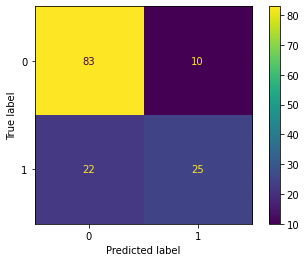

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['0', '1'])

cm_display.plot()
plt.show()

# Predict

In [35]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')

### Hitung BMI

In [54]:
tinggi = float(input('Masukan Tinggi: '))
berat = float(input('Masukan Berat: '))
tinggi /= 100
bmi = berat / tinggi ** 2
print('BMI anda: ', bmi)

Masukan Tinggi: 175
Masukan Berat: 80
BMI anda:  26.122448979591837


In [36]:
test_data = []
dt = []

hml = float(input('Masukan Jumlah kehamilan: '))
glu = float(input('Masukan Glukosa: '))
dia = float(input('Masukan Tekanan Darah (Diastolik): '))
bod = float(input('Masukan BMI: '))
age = float(input('Masukan Umur: '))

dt.append(hml)
dt.append(glu)
dt.append(dia)
dt.append(bod)
dt.append(age)

test_data.append(dt)
# test_data

X_pred = pd.DataFrame(test_data, index=[''], columns=X.columns)
X_pred['Outcome'] = final_log2.predict(X_pred)
print(X_pred)

Masukan Jumlah kehamilan: 0
Masukan Glukosa: 170
Masukan Tekanan Darah (Diastolik): 78
Masukan BMI: 28
Masukan Umur: 55
  Pregnancies  Glucose  BloodPressure   BMI   Age Outcome
          0.0    170.0           78.0  28.0  55.0     Yes


# Save Model

In [37]:
import joblib
import pickle

In [38]:
# save
joblib_file = 'model_77_new_edit.pkl'
joblib.dump(final_log2, joblib_file)

['model_77_new_edit.pkl']

In [ ]:
# save
joblib_file = 'model.h5'
joblib.dump(final_knn2, joblib_file)

In [ ]:
# save
joblib_file = 'model.model'
joblib.dump(final_knn2, joblib_file)

# Test

In [59]:
loaded_model = joblib.load('model_77_new.pkl')
# result = loaded_model.score(X_test, y_test)
# print(result)

In [61]:
test_data = []
dt = []

hml = float(input('Masukan Jumlah kehamilan: '))
glu = float(input('Masukan Glukosa: '))
dia = float(input('Masukan Tekanan Darah (Diastolik): '))
bod = float(input('Masukan BMI: '))
age = float(input('Masukan Umur: '))

dt.append(hml)
dt.append(glu)
dt.append(dia)
dt.append(bod)
dt.append(age)

test_data.append(dt)
# test_data

X_pred = pd.DataFrame(test_data, index=[''], columns=X.columns)
X_pred['Outcome'] = loaded_model.predict(X_pred)
print(X_pred)

Masukan Jumlah kehamilan: 5
Masukan Glukosa: 150
Masukan Tekanan Darah (Diastolik): 70
Masukan BMI: 26
Masukan Umur: 51
  Pregnancies  Glucose  BloodPressure   BMI   Age  Outcome
          5.0    150.0           70.0  26.0  51.0        1
